<a href="https://colab.research.google.com/github/shubham2904/Crime-Analysis-and-Prediction/blob/main/crime_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import datetime
import os
import sys
import matplotlib.image as mpimg
import tensorflow as tf
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import h5py
import keras
import gc
from keras.optimizers import RMSprop,Adam
from keras.layers import AveragePooling2D
from keras.models import Sequential,load_model
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.models import Model
from keras.layers import Input, Dense, MaxPooling2D, MaxPooling3D, Dropout, BatchNormalization, Flatten, Conv2D, Conv3D, AveragePooling3D, LSTM, Reshape
from keras import backend as K
from keras.callbacks import History 
import glob
from mlxtend.data import loadlocal_mnist
import cv2
%matplotlib inline

Using TensorFlow backend.


In [ ]:
#!pip install patool
#import patoolib
#patoolib.extract_archive("/content/drive/My Drive/newtrain.zip", outdir="/content/drive/My Drive/newz/train")


In [ ]:
files = glob.glob('/content/drive/My Drive/New folder (2)/*.png')


In [ ]:
!pip install scipy --upgrade --
print(len(files))

Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.4.1)
33


In [ ]:
"""images = []
for file in files:
  mm = cv2.imread(file)
  b,g,r = cv2.split(mm)       # get b,g,r
  rgb_img = cv2.merge([r,g,b])     # switch it to rgb
  img = cv2.resize(rgb_img,(200,200) )/255
  print(img.shape)
  images.append(img)
images = np.array(images)
img = cv2.cvtColor(img,cv2.COLOR_RGBA2RGB)"""

'images = []\nfor file in files:\n  mm = cv2.imread(file)\n  b,g,r = cv2.split(mm)       # get b,g,r\n  rgb_img = cv2.merge([r,g,b])     # switch it to rgb\n  img = cv2.resize(rgb_img,(200,200) )/255\n  print(img.shape)\n  images.append(img)\nimages = np.array(images)\nimg = cv2.cvtColor(img,cv2.COLOR_RGBA2RGB)'

In [ ]:
images = []
for file in files:
  img=cv2.resize(plt.imread(file),(200,200))/255
  img = cv2.cvtColor(img,cv2.COLOR_RGBA2RGB)
  print(img.shape)
  images.append(img)
images = np.asarray(images).astype('float32')

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


In [ ]:
w,h =200,200  #image shape


In [ ]:
def fn_get_model_convLSTM_tframe_1():
    
    model = Sequential()
    model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                       input_shape=(None, w, h, 3),padding='same', return_sequences=True))
    model.add(BatchNormalization())

    model.add(ConvLSTM2D(filters=60, kernel_size=(3, 3), padding='same', return_sequences=True))
    model.add(BatchNormalization())

    model.add(ConvLSTM2D(filters=60, kernel_size=(3, 3), padding='same', return_sequences=True))
    model.add(BatchNormalization())
    
    model.add(ConvLSTM2D(filters=60, kernel_size=(3, 3), padding='same', return_sequences=False))
    model.add(BatchNormalization())
    

    model.add(Conv2D(filters=60, kernel_size=(3, 3),activation='linear', padding='same', data_format='channels_last'))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=60, kernel_size=(3, 3),activation='linear', padding='same', data_format='channels_last'))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=30, kernel_size=(3, 3),activation='linear', padding='same', data_format='channels_last'))
    model.add(BatchNormalization())

    

    model.add(Conv2D(filters=3, kernel_size=(1, 1),activation='linear', padding='same', data_format='channels_last'))
   

    print(model.summary())
    return model

In [ ]:
model = fn_get_model_convLSTM_tframe_1()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 200, 200, 40 62080     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 200, 200, 40 160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 200, 200, 60 216240    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 200, 200, 60 240       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 200, 200, 60 259440    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 200, 200, 60 240       
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, 200, 200, 60)     

In [ ]:
opt = Adam(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
def batch_genrate(i):
  batch_size = 3
  t_fRAME = 2
  X = []
  Y = []
  k=0
  for k in range(batch_size):
    X.append(images[i+k:i+k+batch_size])
    Y.append(images[k+i+batch_size])
  X = np.asarray(X)
  Y = np.asarray(Y)
  return X,Y

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 200, 200, 40 62080     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 200, 200, 40 160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 200, 200, 60 216240    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 200, 200, 60 240       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 200, 200, 60 259440    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 200, 200, 60 240       
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, 200, 200, 60)     

In [ ]:
model = load_model('/content/drive/My Drive/model/train3.h5')
for i in range(7):
    for j in range(0,30,3):
      X,Y = batch_genrate(j)
      print(i,j)
      history=model.fit(X,Y,verbose=1)
      model.save('/content/drive/My Drive/model/train3.h5')

0 0
Epoch 1/1
3/3 [==============================] - 13s 4s/step - loss: 1.2581e-05
0 3
Epoch 1/1
3/3 [==============================] - 2s 598ms/step - loss: 1.3584e-05
0 6
Epoch 1/1
3/3 [==============================] - 2s 602ms/step - loss: 1.4691e-05
0 9
Epoch 1/1
3/3 [==============================] - 2s 600ms/step - loss: 1.8725e-05
0 12
Epoch 1/1
3/3 [==============================] - 2s 598ms/step - loss: 3.3081e-05
0 15
Epoch 1/1
3/3 [==============================] - 2s 599ms/step - loss: 1.1400e-05
0 18
Epoch 1/1
3/3 [==============================] - 2s 600ms/step - loss: 2.1814e-05
0 21
Epoch 1/1
3/3 [==============================] - 2s 599ms/step - loss: 1.4506e-05
0 24
Epoch 1/1
3/3 [==============================] - 2s 596ms/step - loss: 1.1542e-05
0 27
Epoch 1/1
3/3 [==============================] - 2s 597ms/step - loss: 9.1026e-06
1 0
Epoch 1/1
3/3 [==============================] - 2s 599ms/step - loss: 1.2295e-05
1 3
Epoch 1/1
3/3 [==============================]

In [ ]:
 """!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()"""

'!pip install gputil\n!pip install psutil\n!pip install humanize\nimport psutil\nimport humanize\nimport os\nimport GPUtil as GPU\nGPUs = GPU.getGPUs()'

In [ ]:
"""gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()"""


'gpu = GPUs[0]\ndef printm():\n process = psutil.Process(os.getpid())\n print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))\n print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))\nprintm()'

In [ ]:
model.save('/content/drive/My Drive/model/train3.h5')

In [ ]:
model = load_model('/content/drive/My Drive/model/train3.h5')

In [ ]:
loss = history.history['loss']
plt.plot(15, loss, 'bo', label='Average Training loss')
plt.title('Average Training and validation loss')
plt.xlabel('Average Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
#model =load_model('/content/drive/My Drive/model/train3.h5')

In [ ]:
X,Y = batch_genrate(3)
out_image = model.predict(X)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


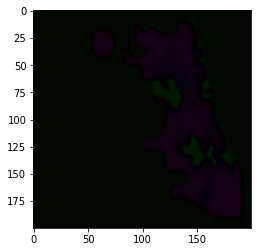

In [ ]:
plt.imshow(out_image[0])

In [ ]:
plt.imshow(out_image[1])


NameError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


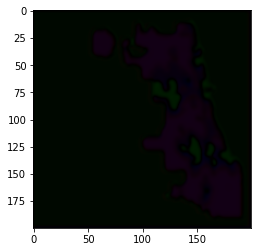

In [ ]:
plt.imshow(out_image[2])

In [ ]:
"""-------------------isse upr tk hi chalana ha----------------"""

'-------------------isse upr tk hi chalana ha----------------'

In [ ]:
cv2.imwrite("out.jpg",cv2.cvtColor(out_image[0]*255, cv2.COLOR_BGR2RGB) )

True

In [ ]:
img = plt.imread('out.jpg')

In [ ]:
X = [] 
for i in range(4):
  X.append(images[1+i])
X.append(img/255)
Y = []
Y.append(X)
X = np.asarray(Y)
out = model.predict(X)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


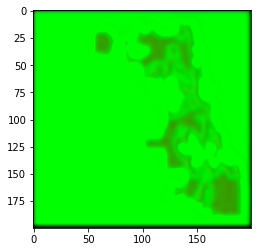

In [ ]:
plt.imshow(out[0])

In [ ]:
cv2.imwrite("out1.jpg",cv2.cvtColor(out_image[0]*255, cv2.COLOR_BGR2RGB) )

True

In [ ]:
out_image = model.predict(X)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


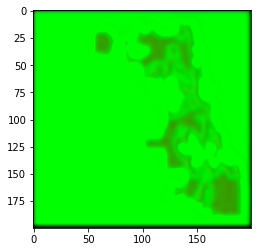

In [ ]:
plt.imshow(out_image[0])

In [ ]:
cv2.imwrite("out2.jpg",cv2.cvtColor(out_image[0]*255, cv2.COLOR_BGR2RGB) )

True

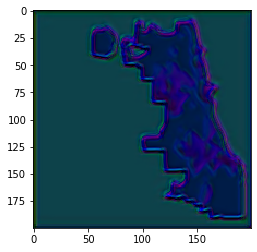

In [ ]:
#plt.imshow(out[0])

In [ ]:
cv2.imwrite("out1.jpg",cv2.cvtColor(out_image[0]*255, cv2.COLOR_BGR2RGB) )

True